In [69]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Вейбулла
Описание распределения: https://ru.wikipedia.org/wiki/Распределение_Вейбулла

In [32]:
#задаем параметры распределения и саму случайную величину, распределенную по Вейбуллу
a, c = 1, 3
weib_rv = sts.exponweib(a, c, scale=100, loc=0)

### 1. Гистограмма 1000 значений, распределенных по Вейбуллу и теор.плотность

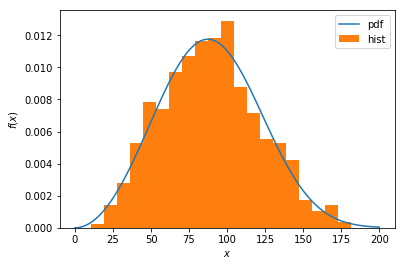

In [181]:
#cоздаем выборку в 1000 значений:
sample=weib_rv.rvs(size=1000)

#задаем значения X и строим график ФПЛ (функции плотности вер)
x = np.linspace(0,200,100)
pdf = weib_rv.pdf(x)

#рисуем гистограмму по конкретным значениям и график плотности
plt.plot(x, pdf, label='pdf')
plt.hist(sample, bins=20, normed=True, label='hist')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best')

### 2. ЦПТ

В нормальном распределении, описывающим среднее выборок распределений по Вейбуллу, значение $\mu$ не зависит от $n$, а вот сама выборка и $\sigma$ зависят. Определим параметры распределения Вейбулла и опишем зависимости функциями.

In [124]:
#определяем дисперсию и матожидание распределения Вейбулла:
weib_d=weib_rv.var()
weib_ex=weib_rv.expect()

#для нормального распределениия средних:
mu_norm = weib_ex

#формирование выборкок размера n:
def rv_generate(n):
    sample_n=np.array([])
    for i in range (1,1001):
        sample_i = weib_rv.rvs(n)
        mean_n=sum(sample_i)/n 
        sample_n=np.append(sample_n, mean_n)
    return sample_n
#определение sigma для норм.распр.:
def sigma_norm(n):
    return math.sqrt(weib_d/n)

Для удобства, напишем общую функцию генерации выборки средних значений, вывода гистограммы по этим значениям и аппроксимирующего их нормального распредления. Далее, для анализа полученных результатов необходимо будет только задавать значения $n$

In [186]:
def weib_norm_generate(n):
    sample_n = rv_generate(n)
    sigma_n = sigma_norm(n)
    for_weib_norm_rv = sts.norm(loc=mu_norm, scale=sigma_n)
    x = np.linspace(40,135,100) #пространство x для всех n будет одинаковым,
    #это позволит показать, как при увеличении n уменьшается дисперсия 
    pdf = for_weib_norm_rv.pdf(x)
    
    #строим график
    plt.hist(sample_n, bins=30, normed=True, label='hist', lw=2)
    plt.plot(x, pdf, label='pdf')
    plt.ylabel('$P(X=x)$')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    plt.title('n='+str(n))

### 3. Анализ

$n=5$

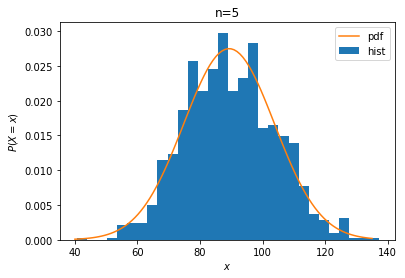

In [187]:
n=5
weib_norm_generate (n)

$n=10$

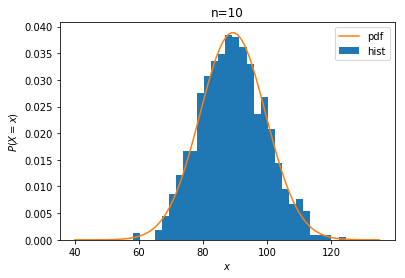

In [188]:
n=10
weib_norm_generate (n)

$n=50$

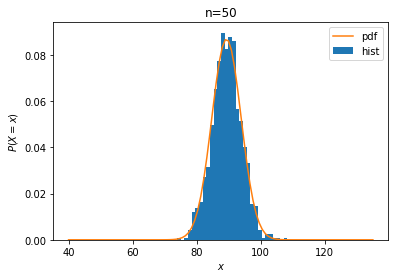

In [189]:
n=50
weib_norm_generate (n)

### Выводы:
Для изучения было выбрано распределение Вейбулла (экспон.распределение - это частный случай Вейбулла).

Для проверки ЦПТ для разных значений объема выборки посчитано средние значения 1000 таких выборок и построены гистограммы распределений. Так же представен график теоритического нормального распределения, который аппроксимирует распределение средних значений. 

Как видно по графикам, действительно, 
- нормально распределение хорошо описывает фактическое распределение средних значений выборок;
- с увеличением объема выборки  ($n$) нормальное распр. более точно аппроксимирует фактические значения. Но для выявлени этой точности (насколько точно) лучше воспользоваться количественными методами, а не визуальной оценкой
- с увеличением объема выборки  ($n$) график сужается, то есть мы все больше сходимся к одному значению, разброс значений становится все меньше (хвосты плотности уменьшаются)